Author: Jase Banta \
Date: 2024-12-06 \
Description: The following python codes are written for an application to University of Chicago M.S. Applied Data Science program. \
1. I shall write a function to randomly select 20% from `bank-additional-full.csv` to form `.csv`.
2. I want to I want to perform some data transformation and standarization.
- Add a new column for age range
- remove hidden characters from `job` column
- Create dict in `Education`
- Treat `unknown` value as None type for columns `Default`, `Housing`, `Loan`.
- Transform columns to binary `Default`, `Housing`, `Loan`, `Y` 
- Calculate basic stats:
    - overall martial status, success rate, job categories, education level, house 
    - Age distribution (visualization) colored by marital status
    - Job and housing 

Moro, S., P. Rita, and P. Cortez. 2014. Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

In [3]:
import csv, random
import pandas as pd
import numpy as np

class Utility:
    def __init__(self):
        pass

    def random_select(self, source: str, target: str, size: float) -> str:
        with open(source, 'r') as file:
            reader = csv.reader(file, delimiter= ';')
            header = next(reader)
            data = list(reader)
            size = round(size * len(data))
            sample_rows = random.sample(data, min(size, len(data)))

        with open(target, 'w', newline= '') as outfile:
            writer = csv.writer(outfile, delimiter= ',')
            writer.writerow(header)
            writer.writerows(sample_rows)
        
        return target

    def formatEducation(self, value):
        pass
    
    def transformBinary(self, df, columns: list):
        mapping = {
            'yes': True,
            'no': False,
            'unknown': np.nan
        }
        for column in columns:
            df[column] = df[column].replace(mapping)

        return df
    
    def AgeMasking(self, age: int):
        age_gorup = np.nan
        if age < 18:
            age_gorup = '< 18'
        elif 18 <= age < 37:
            age_gorup = '18-36'
        elif 37 <= age < 55:
            age_gorup = '37-54'
        elif 54 <= age < 73:
            age_gorup = '54-72'
        elif 73 <= age < 91:
            age_gorup = '73-90'
        elif age >= 90:
            age_gorup = '90+'
        return age_gorup

In [4]:
source='bank-additional-full.csv'
target='bank-sample.csv'
size = 0.1
with open(source, 'r') as file:
    reader = csv.reader(file, delimiter= ';')
    header = next(reader)
    data = list(reader)
    size = round(size * len(data))
    sample_rows = random.sample(data, min(size, len(data)))

with open(target, 'w', newline= '') as outfile:
    writer = csv.writer(outfile, delimiter= ',')
    writer.writerow(header)
    writer.writerows(sample_rows)

In [5]:
import pandas as pd

util = Utility()
sample = util.random_select(source='bank-additional-full.csv', target='bank-sample.csv', size=0.15)
data = pd.read_csv(sample)
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,60,entrepreneur,married,basic.4y,no,no,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1,48,management,married,university.degree,no,no,no,cellular,oct,wed,...,1,999,1,failure,-3.4,92.431,-26.9,0.740,5017.5,no
2,47,services,divorced,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
3,24,blue-collar,single,high.school,no,yes,no,cellular,apr,mon,...,1,999,1,failure,-1.8,93.749,-34.6,0.645,5008.7,no
4,34,technician,married,professional.course,no,yes,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no


In [6]:
data['job'].apply(lambda val: val.rstrip(".,!?"))

0       entrepreneur
1         management
2           services
3        blue-collar
4         technician
            ...     
6173           admin
6174           admin
6175           admin
6176         unknown
6177     blue-collar
Name: job, Length: 6178, dtype: object

In [7]:
data["education"].apply(lambda val: val.replace('.', '-'))

0                  basic-4y
1         university-degree
2               high-school
3               high-school
4       professional-course
               ...         
6173      university-degree
6174            high-school
6175            high-school
6176            high-school
6177            high-school
Name: education, Length: 6178, dtype: object

In [8]:
new_data = util.transformBinary(df = data, columns = ['default', 'housing','loan','y'])
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,60,entrepreneur,married,basic.4y,False,False,True,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,False
1,48,management,married,university.degree,False,False,False,cellular,oct,wed,...,1,999,1,failure,-3.4,92.431,-26.9,0.740,5017.5,False
2,47,services,divorced,high.school,False,False,False,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,False
3,24,blue-collar,single,high.school,False,True,False,cellular,apr,mon,...,1,999,1,failure,-1.8,93.749,-34.6,0.645,5008.7,False
4,34,technician,married,professional.course,False,True,False,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,30,admin.,married,university.degree,False,True,False,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,False
6174,36,admin.,married,high.school,False,False,False,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,False
6175,52,admin.,married,high.school,False,False,False,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,False
6176,43,unknown,married,high.school,NaN,True,True,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [9]:
new_data['age_group']=new_data['age'].apply(lambda val: util.AgeMasking(val))

In [62]:
new_data['age'].describe()

count    6178.000000
mean       39.906604
std        10.261871
min        17.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        89.000000
Name: age, dtype: float64

Calculate stats

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6178 non-null   int64  
 1   job             6178 non-null   object 
 2   marital         6178 non-null   object 
 3   education       6178 non-null   object 
 4   default         4836 non-null   object 
 5   housing         6040 non-null   object 
 6   loan            6040 non-null   object 
 7   contact         6178 non-null   object 
 8   month           6178 non-null   object 
 9   day_of_week     6178 non-null   object 
 10  duration        6178 non-null   int64  
 11  campaign        6178 non-null   int64  
 12  pdays           6178 non-null   int64  
 13  previous        6178 non-null   int64  
 14  poutcome        6178 non-null   object 
 15  emp.var.rate    6178 non-null   float64
 16  cons.price.idx  6178 non-null   float64
 17  cons.conf.idx   6178 non-null   f

In [60]:
pivot_table = new_data.pivot_table(
    values='y', 
    index=['education'], 
    columns=['job'],
    aggfunc='mean',
    fill_value=np.nan
    )
pivot_table

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,0.000000,0.060440,0.047619,0.093750,0.000000,0.337500,0.000000,0.000000,0.500000,0.181818,0.076923,0.000000
basic.6y,0.115385,0.060086,0.235294,0.000000,0.222222,0.100000,0.000000,0.105263,0.500000,0.200000,0.250000,0.000000
basic.9y,0.067568,0.049558,0.085714,0.076923,0.000000,0.153846,0.000000,0.065574,0.411765,0.188679,0.117647,0.000000
high.school,0.105372,0.103704,0.025641,0.100000,0.071429,0.272727,0.111111,0.059783,0.281250,0.112676,0.187500,0.000000
illiterate,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
professional.course,0.166667,0.129630,0.000000,0.250000,0.142857,0.368421,0.038462,0.147059,0.500000,0.091102,0.111111,0.000000
university.degree,0.145336,0.142857,0.106383,0.080000,0.128378,0.319149,0.151786,0.173913,0.370370,0.119231,0.243243,0.500000
unknown,0.135135,0.047619,0.125000,0.222222,0.071429,0.388889,0.000000,0.266667,0.357143,0.052632,1.000000,0.076923


In [13]:
new_data['age_group']=new_data['age'].apply(lambda val: util.AgeMasking(val))

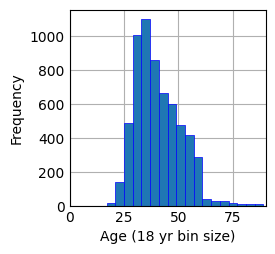

In [41]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots()

ax.hist(new_data['age'], bins = 18, linewidth = 0.5, edgecolor = 'blue')
ax.set(xlim=(0, 90), xlabel= "Age (18 yr bin size)", ylabel= "Frequency")

plt.show()

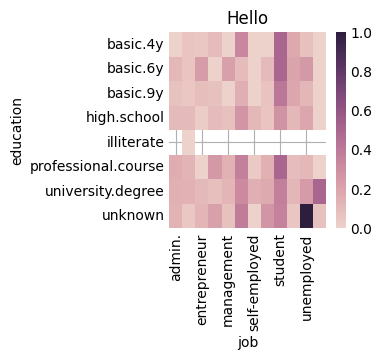

In [58]:
seaborn.heatmap(pivot_table, cmap=seaborn.cubehelix_palette(as_cmap=True))
plt.title("Hello")
plt.show()

In [ ]:
new_data[['age', 'duration', 'poutcome']].describe()

,age,duration
count,6178.000000,6178.000000
mean,39.906604,263.483328
std,10.261871,266.659905
min,17.000000,4.000000
25%,32.000000,103.000000
50%,38.000000,181.000000
75%,47.000000,327.000000
max,89.000000,3631.000000
